## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import tensorflow.feature_column as fc

In [51]:
from tensorflow.feature_column import numeric_column, categorical_column_with_vocabulary_list

## Importing Dataset

In [3]:
df = pd.read_csv("SaYoPillow.csv")

In [4]:
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


## Droping Columns

In [5]:
df_new = df.drop(['sr', 'lm', 'rem'], axis=1)

In [6]:
df_new.head()

,rr,t,bo,sr.1,hr,sl
0,25.680,91.840,89.840,1.840,74.20,3
1,25.104,91.552,89.552,1.552,72.76,3
2,20.000,96.000,95.000,7.000,60.00,1
3,23.536,90.768,88.768,0.768,68.84,3
4,17.248,97.872,96.248,8.248,53.12,0


## Scaling Dataset

In [7]:
scaler = MinMaxScaler()
df_x = df_new[['rr','t','bo', 'sr.1', 'hr']]
scaler.fit(df_x)
X_scaled = scaler.transform(df_x)

In [8]:
column_values = ['respiration_rate', 'body_temperature', 'blood_oxygen', 'sleeping_hours', 'heart_rate', 'stress_level']

In [9]:
df_scaled = pd.DataFrame(np.concatenate((X_scaled, df_new[['sl']]), axis=1), columns = column_values)

In [10]:
df_scaled.head()

,respiration_rate,body_temperature,blood_oxygen,sleeping_hours,heart_rate,stress_level
0,0.691429,0.488571,0.522667,0.204444,0.691429,3.0
1,0.650286,0.468000,0.503467,0.172444,0.650286,3.0
2,0.285714,0.785714,0.866667,0.777778,0.285714,1.0
3,0.538286,0.412000,0.451200,0.085333,0.538286,3.0
4,0.089143,0.919429,0.949867,0.916444,0.089143,0.0


## EDA

In [11]:
df_scaled.corr()

,respiration_rate,body_temperature,blood_oxygen,sleeping_hours,heart_rate,stress_level
respiration_rate,1.000000,-0.889237,-0.889210,-0.891855,1.000000,0.963516
body_temperature,-0.889237,1.000000,0.998108,0.954860,-0.889237,-0.962354
blood_oxygen,-0.889210,0.998108,1.000000,0.950189,-0.889210,-0.961092
sleeping_hours,-0.891855,0.954860,0.950189,1.000000,-0.891855,-0.973036
heart_rate,1.000000,-0.889237,-0.889210,-0.891855,1.000000,0.963516
stress_level,0.963516,-0.962354,-0.961092,-0.973036,0.963516,1.000000


<Axes: >

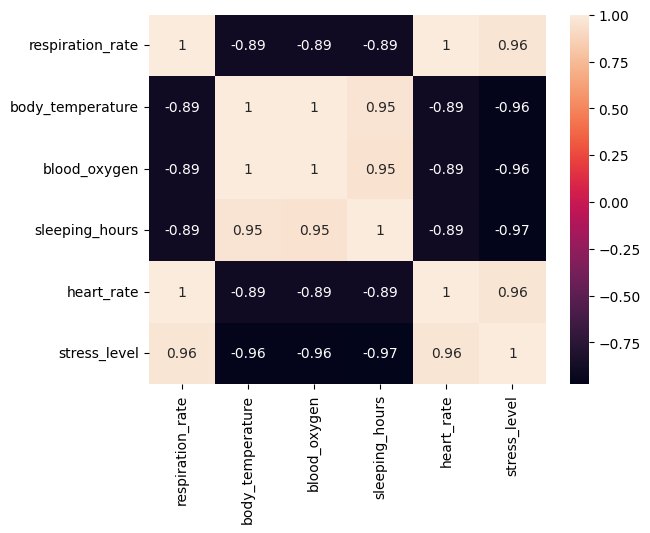

In [12]:
sns.heatmap(df_scaled.corr(), annot=True)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df_scaled[['respiration_rate', 'body_temperature', 'blood_oxygen', 'sleeping_hours', 'heart_rate']]
y = df_scaled[[ 'stress_level']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [15]:
#model = tf.keras.Sequential([
    #tf.keras.layers.Dense(2, activation='sigmoid', name = 'layer1'),
    #tf.keras.layers.Dense(1, activation='sigmoid', name = 'layer2'),
#])
#model.build(input_shape=(None, 5))
#model.summary()

In [16]:
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
#model.fit(X_train, y_train, epochs=10, batch_size=16)

In [19]:
#converter = tf.lite.TFLiteConverter.from_keras_model(model)
#tflite_model = converter.convert()


#with open('model1.tflite', 'wb') as f:
  #f.write(tflite_model)

In [21]:
#pip install skl2onnx

In [23]:
#pip install --upgrade skl2onnx

In [24]:
#import joblib

In [25]:
#joblib.dump(model, 'decision_tree_model.pkl')

In [26]:
#model = joblib.load('decision_tree_model.pkl')

In [27]:
#pip install tensorflow_decision_forests

In [28]:
#pip install wurlitzer

In [29]:
#import tensorflow_decision_forests as tfdf

In [30]:
#df_train = pd.concat([X_train, y_train], axis=1)

In [31]:
#df_test = pd.concat([X_test, y_test], axis=1)

In [32]:
#model_1 = tfdf.keras.RandomForestModel(verbose=2)

#model_1.fit(train_ds)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [59]:
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [60]:
y_pred = knn_classifier.predict(X_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)

In [64]:
print(f"Accuracy :{accuracy*100} %")

Accuracy :100.0 %


In [63]:
import pickle
pickle_out = open("classifier.pkl", "wb")
pickle.dump(knn_classifier, pickle_out)
pickle_out.close()